# Random 3D Data Generator
This code created by Zachary Neronha to generate synthetic 3D data for topological data analysis 

In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## 1.1 Generate random points on a sphere
Points will be randomly distributed a certain small distance off the surface of the sphere

In [49]:
r = 1
samplepts = 200
theta = 2*np.pi*np.random.rand(samplepts)
pa = np.random.rand(samplepts)*2-1
phi = np.arccos(pa)

#convert to cartesian points on a circle
x = r*np.cos(theta)*np.sin(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(phi)

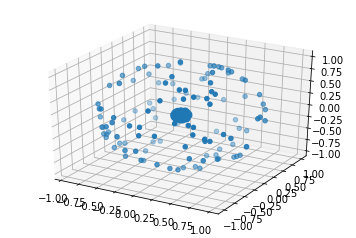

In [62]:
#plot for confirmation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

In [51]:
#Compile data and export data points as csv
savemat1 = np.zeros((samplepts,3))
savemat1[:,0] = x
savemat1[:,1] = y
savemat1[:,2] = z

np.savetxt("Practice3DTDA_Sph.csv", savemat1, delimiter=",")

## 1.2 Generate two concentric spheres and export together

In [66]:
r1 = 0.2
r2 = 1
samplepts = 100
theta1 = 2*np.pi*np.random.rand(samplepts/5)
pa1 = np.random.rand(samplepts/5)*2-1
phi1 = np.arccos(pa1)

#convert to cartesian points on a circle
x1 = r1*np.cos(theta1)*np.sin(phi1)
y1 = r1*np.sin(theta1)*np.sin(phi1)
z1 = r1*np.cos(phi1)

theta2 = 2*np.pi*np.random.rand(samplepts)
pa2 = np.random.rand(samplepts*2-1)
phi2 = np.arccos(pa2)

# now for the second sphere
x2 = r2*np.cos(theta2)*np.sin(phi2)
y2 = r2*np.sin(theta2)*np.sin(phi2)
z2 = r2*np.cos(phi2)

ValueError: operands could not be broadcast together with shapes (100,) (199,) 

In [61]:
#Compile data and export data points as csv
savemat2 = np.zeros((samplepts*2,3))
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)
z = np.concatenate((z1,z2),axis=0)
savemat2[:,0] = x
savemat2[:,1] = y
savemat2[:,2] = z

np.savetxt("Practice3DTDA_Sph2.csv", savemat2, delimiter=",")